In [21]:
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 365
ds = [0.4]

for i in ds:
    print(i)
    S_max = 3*S0  # Máximo valor del eje de precios
    ds = i  # Tamaño de los saltos del precio
    ns = int(S_max / ds)  # Número de Particiones para el activo

    dt = (ds / (sigma * S_max))**2  
    nt = int(T / dt)  # Número de Particiones para el tiempo
    dt = T / nt  # Tamaño de los saltos del tiempo
    S = np.arange(0, S_max + ds, ds)  # Vector de precios

    # Matriz de la opción
    f_call = np.zeros((nt + 1, ns + 1))
    f_call[:, ns] = S_max - K # Frontera derecha
    f_call[-1, :] = np.maximum(S - K, 0)  # Frontera Inferior

    # Coeficientes
    a = np.zeros(ns + 1)
    b = np.zeros(ns + 1)
    c = np.zeros(ns + 1)

    for j in range(ns + 1):
        a[j] = (dt / (1 + r * dt)) * ((-1/2) * r * j + (1/2) * sigma**2 * j**2)
        b[j] = (dt / (1 + r * dt)) * ((1/dt) - sigma**2 * j**2)
        c[j] = (dt / (1 + r * dt)) * ((1/2) * r * j + (1/2) * sigma**2 * j**2)

    # Cálculo hacia atrás de la opción call
    for i in range(nt - 1, -1, -1):
        for j in range(1, ns):
            f_call[i, j] = a[j] * f_call[i + 1, j - 1] + b[j] * f_call[i + 1, j] + c[j] * f_call[i + 1, j + 1]

    print(f_call[0, int(S0/ds)])

0.4
14.486310553257418


In [20]:
((14.488203788416673-14.48614371230863)/14.488203788416673)*100

0.014218989034995076

In [40]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)

N = [4500,5000,6000,7000]

for n in N:
    print(n)
    dt = T/n
    # Cálculo de u, d y p
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)

    # Inicialización de la matriz de precios del subyacente y opciones
    S_t = np.zeros((n + 1, n + 1))
    f_call = np.zeros((n + 1, n + 1))

    # Rellenar la matriz de precios del subyacente
    for i in range(n + 1):
        for j in range(i + 1):
            S_t[i, j] = S0 * u**j * d**(i - j)

    # Condiciones finales de la opción call
    f_call[-1, :] = np.maximum(S_t[-1, :]-K, 0)

    # Cálculo hacia atrás de la opción call americana
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            f_call[i, j] = (np.exp(-r * dt)) * ((1 - p) * f_call[i + 1, j] + p * f_call[i + 1, j + 1])

    # Valor de la opción en el tiempo t=0
    print(f_call[0, 0])


4500
14.488372451054476
5000
14.488344160884878
6000
14.488389915217246
7000
14.488338465360412


In [44]:
((14.488203788416673-14.488338465360412)/14.488203788416673)*100

-0.0009295627374253182

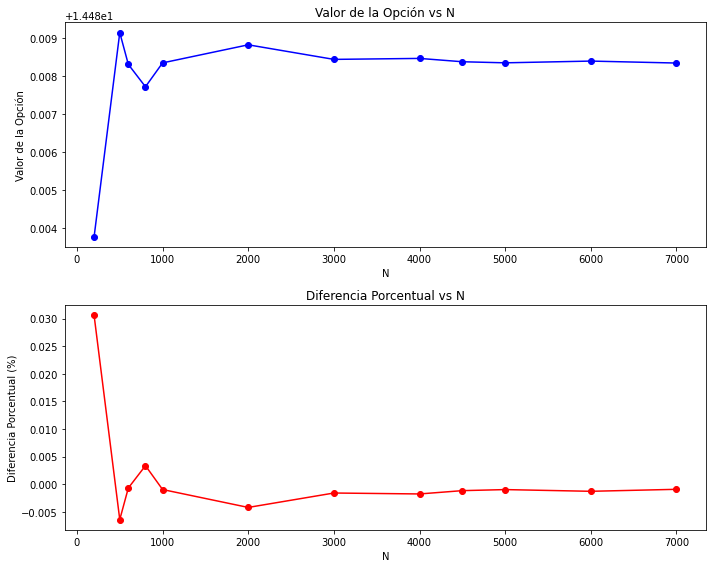

In [1]:
import matplotlib.pyplot as plt

n = [200, 500, 600, 800, 1000, 2000, 3000, 4000, 4500, 5000, 6000, 7000]
valor_opcion = [14.483774308978006, 14.489136767150207, 14.488302885123634, 14.487716064050996, 14.488342703445188, 14.488816727112855, 14.488434424117408, 14.488459923367587, 14.488372451054476, 14.488344160884878, 14.488389915217246, 14.488338465360412]
diferencia_porcentual = [0.0306, -0.0064, -0.00068, 0.00336, -0.00096, -0.0042, -0.00159, -0.00176, -0.00116, -0.00097, -0.00128, -0.00092]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Gráfica para el valor de la opción
axes[0].plot(n, valor_opcion, marker='o', color='b')
axes[0].set_title('Valor de la Opción vs N')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Valor de la Opción')

# Gráfica para la diferencia porcentual
axes[1].plot(n, diferencia_porcentual, marker='o', color='r')
axes[1].set_title('Diferencia Porcentual vs N')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Diferencia Porcentual (%)')

# Ajustar layout y mostrar gráficas
plt.tight_layout()
plt.show()
